In [1]:
from datetime import datetime
from secedgar.filings import Filing, FilingType
import os
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import secedgar
%load_ext autoreload
%autoreload 2

In [2]:
os.chdir(os.path.join(os.getcwd(), ".."))

In [3]:
from api.api_utils import (create_dir, make_patch_spines_invisible, create_ticker2name, 
                           create_combined_data, download_filing_4,
                           InsiderAggregators, calculate_aggregates_per_insider,
                           read_all_form_4, 
                           visualization_insider_stock)

## Relevant Information
**FORM 4** - https://www.sec.gov/files/forms-3-4-5.pdf

### securityadcode:
- Derivatives Holdings: D,DA,DD
- Non-Derivative Holdings:  N,NA,ND

### Transaction Code Transaction:
- **A** - Grant, award, or other acquisition of securities from the company (such as an option)
    - May indicate certainty on results about the company
- **K** - Equity swaps and similar hedging transactions
    - *IGNORE*
- **P** - Purchase of securities on an exchange or from another person
    - Indicates additional purchase (maybe good news or confidence about the ecompany)
- **S** - Sale of securities on an exchange or to another person
    - If lot of sales, may indicate loss of confidence about the company. Not good results
- **D** - Sale or transfer of securities back to the company
    - *IGNORE*
- **F** - Payment of exercise price or tax liability using portion of securities received from the company
    - *IGNORE* - Don't know about, may ignore them
- **M** - Exercise or conversion of derivative security received from the company (such as an option)
    - Mainly options  for employees. They buy (may be good indicator)
- **G** - Gift of securities by or to the insider
    - *IGNORE* Gift for the sons or things like that (maybe useful) Ignore for now
- **V** - A transaction voluntarily reported on Form 4
    - *IGNORE*
- **J** - Other (accompanied by a footnote describing the transaction)
    - *IGNORE*

### directorindirect
- **D**
- **I**


## Resources
https://www.sec.gov/edgar/search/#/q=WMT&dateRange=custom&startdt=2018-07-27&enddt=2018-12-31&category=form-cat2&locationType=located&locationCode=all&forms=3%252C4%252C5&page=1

**Latest** RSS Feed
- https://www.sec.gov/cgi-bin/browse-edgar?action=getcurrent&datea=&dateb=&company=&type=4&SIC=&State=&Country=&CIK=&owner=only&accno=&start=0&count=100
Can go deeper for the XML file


### WMT FORM 4 reports examples
https://www.sec.gov/Archives/edgar/data/0000104169/000112760218037607/xslF345X03/form4.xml
https://www.sec.gov/Archives/edgar/data/0000104169/000112760218037605/xslF345X03/form4.xml
https://www.sec.gov/Archives/edgar/data/0000104169/000112760218037606/xslF345X03/form4.xml

**Inputs**

In [4]:
tot_companies = 30 # None = All sp100

**Paths**

In [5]:
data_path = os.path.join(os.getcwd(), "data")
data_filings_path = os.path.join(data_path, "filings")
sp_100_file = os.path.join(data_path, "top40_sp500.csv")

create_dir(data_filings_path)

In [6]:
sp100_companies = pd.read_csv(sp_100_file)
sp100_symbols = sp100_companies["Symbol"].unique()

In [7]:
for symbol in sp100_symbols[:tot_companies]:
    print("symbol: ",symbol)
    symbol = symbol.replace(".", "-")
    download_filing_4(symbol, data_filings_path,
                      start_date=datetime(2020, 5, 1),
                      end_date=datetime(2020, 6, 30))

symbol:  MSFT
Already downloaded
symbol:  AAPL
Already downloaded
symbol:  AMZN
Already downloaded
symbol:  FB
Already downloaded
symbol:  GOOGL
Already downloaded
symbol:  GOOG
Already downloaded
symbol:  JNJ
Already downloaded
symbol:  BRK.B
Already downloaded
symbol:  V
Already downloaded
symbol:  PG
Already downloaded
symbol:  JPM
Already downloaded
symbol:  HD
Already downloaded
symbol:  UNH
Already downloaded
symbol:  MA
Already downloaded
symbol:  NVDA
Already downloaded
symbol:  VZ
Already downloaded
symbol:  NFLX
Already downloaded
symbol:  ADBE
Already downloaded
symbol:  DIS
Already downloaded
symbol:  INTC
Already downloaded
symbol:  PYPL
Already downloaded
symbol:  T
Already downloaded
symbol:  PFE
Already downloaded
symbol:  CSCO
Already downloaded
symbol:  MRK
Already downloaded
symbol:  CMCSA
Already downloaded
symbol:  PEP
Already downloaded
symbol:  BAC
Already downloaded
symbol:  KO
Already downloaded
symbol:  XOM
Already downloaded


**Listing CIK**

In [8]:
#ciks = secedgar.utils.get_cik_map().keys()
#for cik in ciks:
#    if cik.startswith("BR"):
#        print(cik)
#
#a = secedgar.filings.cik_lookup.CIKLookup("BRK-B")
#
#def is_int(n):
#    try:
#        float_n = float(n)
#        int_n = int(float_n)
#    except ValueError:
#        return False
#    else:
#        return float_n == int_n
#
#def is_float(n):
#    try:
#        float_n = float(n)
#    except ValueError:
#        return False
#    else:
#        return True
#nums = ['12', '12.3', '12.0', '123.002', "68.97", "1079700.0000", "52.0000", 
#    "5246.6610", "615.4", "18201.527", "108.73"]
#
#for num in nums:
#    if is_int(num):
#        print(num, 'can be safely converted to an integer.')
#    elif is_float(num):
#        print(num, 'is a float with non-zero digit(s) in the fractional-part.')

In [9]:
data_extracted_filename = os.path.join("data", "data.csv")
if not(os.path.exists(data_extracted_filename)):
    data = read_all_form_4(data_filings_path)
    data.to_csv(data_extracted_filename, index=False, header=True)
else:
    data = pd.read_csv(data_extracted_filename, header=0)

In [10]:
data.head()

,transactiondate,transactionshares,transactionpricepershare,transactioncode,officerTitle,rptOwnerName,issuername,ticker,transactionvalue
0,2020-04-30,93.895,16.34,A,EVP and CFO,Ellis Matthew D.,VERIZON COMMUNICATIONS INC,VZ,1534.24430
1,2020-04-30,40.241,16.34,A,SVP & Controller,Skiadas Anthony T,VERIZON COMMUNICATIONS INC,VZ,657.53794
2,2019-09-26,1349.000,60.14,S,EVP&ChiefAdminLegal&PubPolOff,SILLIMAN CRAIG L.,VERIZON COMMUNICATIONS INC,VZ,81128.86000
3,2019-10-31,146.232,17.20,A,EVP&ChiefAdminLegal&PubPolOff,SILLIMAN CRAIG L.,VERIZON COMMUNICATIONS INC,VZ,2515.19040
4,2019-10-17,76.539,17.19,A,EVP and Group CEO-VZ Business,Erwin Tami A.,VERIZON COMMUNICATIONS INC,VZ,1315.70541


In [11]:
data["transactioncode"].unique()

array(['A', 'S', 'M', 'P', 'G', 'F', 'I', 'C', 'J', 'X', 'D', nan],
      dtype=object)

In [12]:
data["ticker"].unique()

array(['VZ', 'AMZN', 'AAPL', 'CMCSA', 'PTON', 'PFE', 'IMRA', 'SWTX',
       'CRTX', 'PEP', 'GOOG', 'CRWD', 'CRCM', 'WMT', 'CVX', 'INTC', 'MA',
       'HD', 'MRK', 'JNJ', 'FUSN', 'BAC', 'NAD', 'PMFLX', 'NTX', 'MNE',
       'PNI', 'NNC', 'PTY', 'AFB', 'FMN', 'BRKA', 'LSXMK', 'BRK.A',
       'LBTYA', 'DVA', 'USB', 'BK', 'DAL', 'LUV', 'FB', '[FB]', 'CRM',
       'COST', 'TMO', 'MSFT', 'ABBV', 'MCD', 'NFLX', 'ACN', 'T', 'PYPL',
       'PG', 'XOM', 'ABT', 'NVDA', 'AMGN', 'BGNE', 'UNH', 'DIS', 'CSCO',
       'KO', 'ADBE', 'V', 'JPM'], dtype=object)

In [13]:
dict_ticker = {"[FB]": "FB", 
               'BRK.A': "BRK-B", 
               "BRKA": "BRK-B"}
data['ticker'] = data['ticker'].map(dict_ticker).fillna(data['ticker'])

In [14]:
data = data.dropna(subset=["transactiondate"])

## Visualization

In [15]:
dict_frames = create_combined_data(data)
ticker2name = create_ticker2name(data)

- NNC: No data found, symbol may be delisted


In [16]:
for key, val in dict_frames.items():
    print(key)
    # visualization_insider_stock(key, val, ticker2name, save_path=None, from_api=False,
    #                             start_date=datetime(2019, 7, 20), figsize=(18, 20), 
    #                             # codes=["S", "P", "M", "A", "F", "G"],
    #                             # display=["price", "volume"]
    #                            )

VZ
AMZN
AAPL
CMCSA
PTON
PFE
IMRA
SWTX
CRTX
PEP
GOOG
CRWD
CRCM
WMT
CVX
INTC
MA
HD
MRK
JNJ
FUSN
BAC
NAD
PMFLX
NTX
MNE
PNI
NNC
PTY
AFB
FMN
BRK-B
LSXMK
LBTYA
DVA
USB
BK
DAL
LUV
FB
CRM
COST
TMO
MSFT
ABBV
MCD
NFLX
ACN
T
PYPL
PG
XOM
ABT
NVDA
AMGN
BGNE
UNH
DIS
CSCO
KO
ADBE
V
JPM


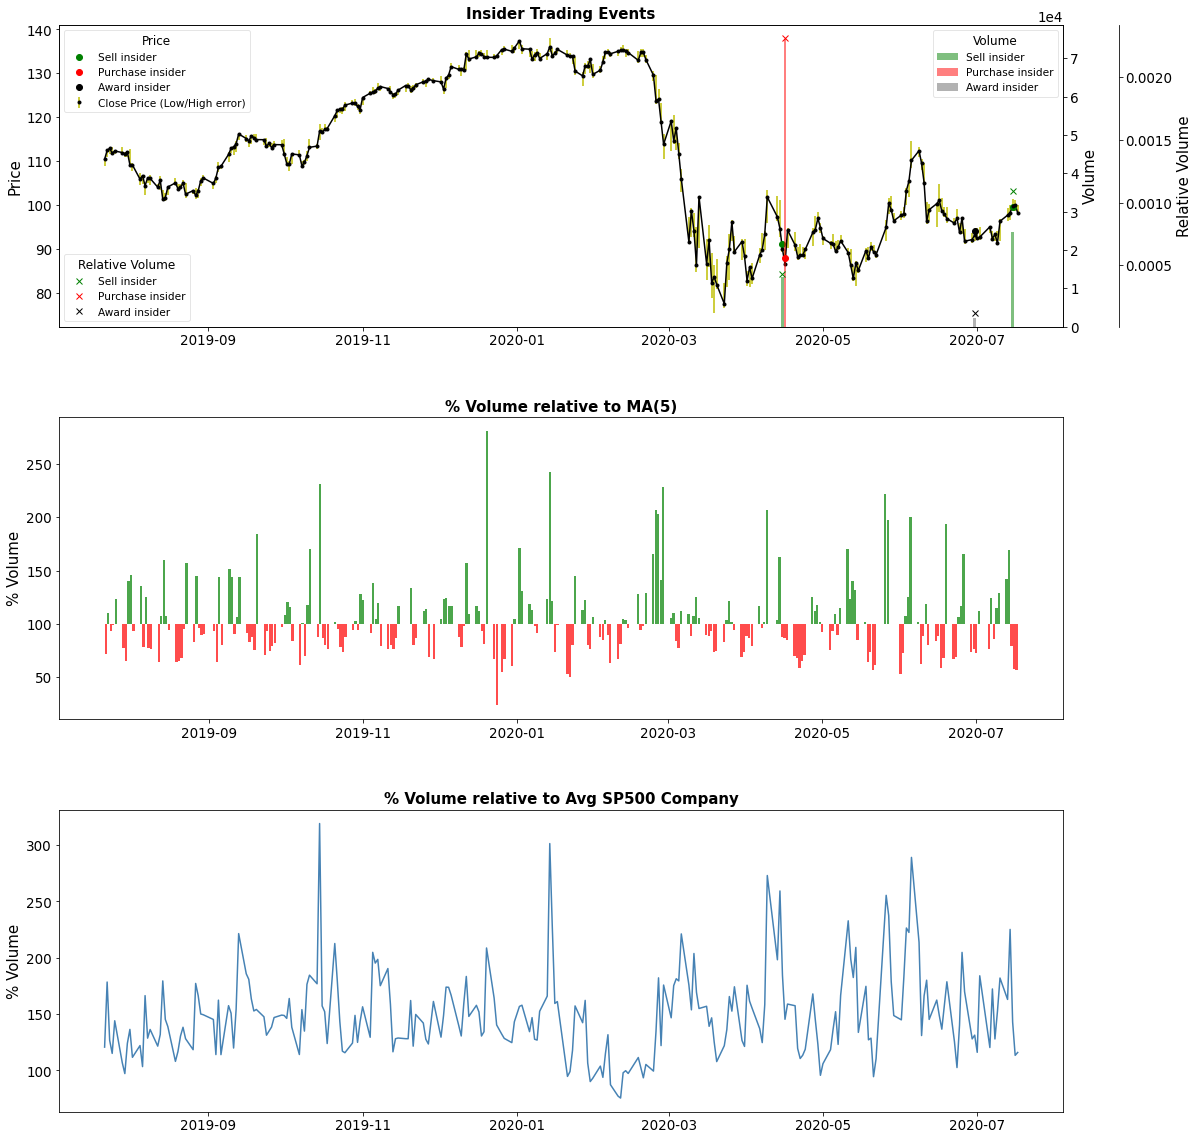

In [17]:
visualization_insider_stock(key, val, ticker2name, save_path=None, from_api=False,
                                start_date=datetime(2019, 7, 20), figsize=(18, 20), 
                                # codes=["S", "P", "M", "A", "F", "G"],
                                # display=["price", "volume"]
                               )

In [18]:
dict_top_insiders = {}
for symbol in sp100_symbols[:tot_companies]:
    aggregates_insider = calculate_aggregates_per_insider(data, symbol)
    dict_top_insiders[symbol] = aggregates_insider

In [19]:
dict_top_insiders["AAPL"]

'<style  type="text/css" >\n</style><table id="T_0c962218_d200_11ea_9cc4_acde48001122" ><thead>    <tr>        <th class="col_heading level0 col0" >Owner Name</th>        <th class="col_heading level0 col1" >Officer Title</th>        <th class="col_heading level0 col2" >Avg Price Per Share</th>        <th class="col_heading level0 col3" >Shares Traded</th>        <th class="col_heading level0 col4" >A Shares Reported</th>        <th class="col_heading level0 col5" >G Shares Reported</th>        <th class="col_heading level0 col6" >M Shares Reported</th>        <th class="col_heading level0 col7" >S Shares Reported</th>    </tr></thead><tbody>\n                <tr>\n                                <td id="T_0c962218_d200_11ea_9cc4_acde48001122row0_col0" class="data row0 col0" >COOK TIMOTHY D</td>\n                        <td id="T_0c962218_d200_11ea_9cc4_acde48001122row0_col1" class="data row0 col1" >Chief Executive Officer</td>\n                        <td id="T_0c962218_d200_11ea_9cc4

In [20]:
ticker = "VZ"

In [21]:
out = data[data["ticker"] == ticker].groupby(["rptOwnerName"])\
        .agg({"officerTitle": InsiderAggregators.title,
              "transactionpricepershare": InsiderAggregators.mean_exclude_le_0,
              "transactionshares": np.sum}).sort_values("transactionshares", ascending=False).reset_index()
out.columns = ["Owner Name", "Officer Title", "Avg Price Per Share", "Shares Traded"]
out["Officer Title"] = out["Officer Title"].fillna("-")


aux = data[data["ticker"] == ticker].groupby(["rptOwnerName", 
                                        "transactioncode"])["transactionshares"].sum().to_frame().unstack(1)
aux.columns = [code + " Shares Reported" for _,code in aux.columns]
aux = aux.fillna(0).reset_index()
aux = aux.rename(columns={"rptOwnerName": "Owner Name"})
out = out.merge(aux, how="left", on="Owner Name")

In [28]:
style_dict = {col:"{:,.0f}" for col in out.columns[4:]}
style_dict["Avg Price Per Share"] = "{:.2f}"
style_dict["Shares Traded"] = "{:,.0f}"
styled_output = out.style.set_properties(**{'text-align': 'right'}).format(style_dict, na_rep="-").hide_index().render()

In [29]:
styled_output
#out_styled["Avg Price Per Share"] = out_styled["Avg Price Per Share"]

'<style  type="text/css" >\n    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col0 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col1 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col2 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col3 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col4 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col5 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col6 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row0_col7 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row1_col0 {\n            text-align:  right;\n        }    #T_9ed0b87c_d201_11ea_9cc4_acde48001122row1_col1 {\n            text-align:  right;\n 